# Autoencoders

## Import the libraries

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

Using TensorFlow backend.


## Load the data

We don't need the labels as the autoencoders are unsupervised network

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

## Normalize the data

We want the pixels values between 0 and 1 instead of between 0 and 255

In [3]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Flatten the images for the Fully-Connected Networks

In [4]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


# **Basic Autoencoder**

### Create the network

The first network is the most simple autoencoder. It has three layers : Input - encoded - decoded

In [7]:
input_size = 784
hidden_size = 64
output_size = 784

In [8]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

### Train

In [9]:
epochs = 30
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.0446 - val_loss: 0.0220
Epoch 2/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.0168 - val_loss: 0.0124
Epoch 3/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.0105 - val_loss: 0.0085
Epoch 4/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.0076 - val_loss: 0.0064
Epoch 5/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 6/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.0053 - val_loss: 0.0048
Epoch 7/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.0049 - val_loss: 0.0045
Epoch 8/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0046 - val_loss: 0.0044
Epoch 9/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.0044 - val_loss: 0.0042
Epoch

### Predict on the test set

In [10]:
decoded_imgs = autoencoder.predict(X_test)

### Plot

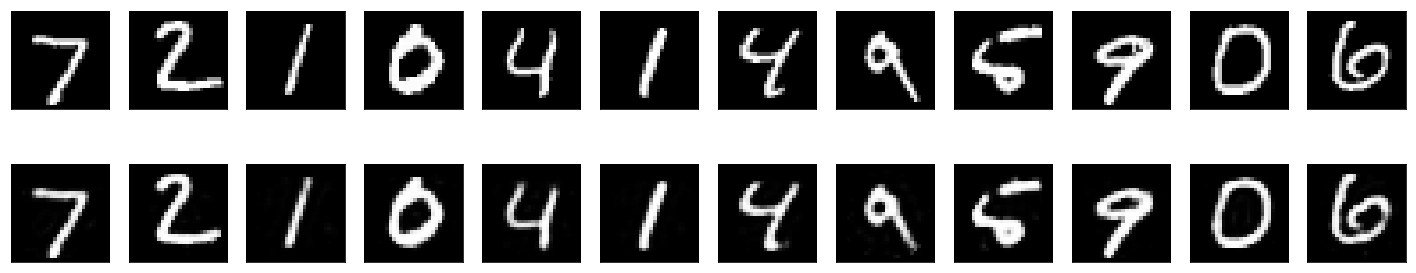

In [11]:
n = 12
plt.figure(figsize=(25, 8))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### Plot the losses

dict_keys(['val_loss', 'loss'])


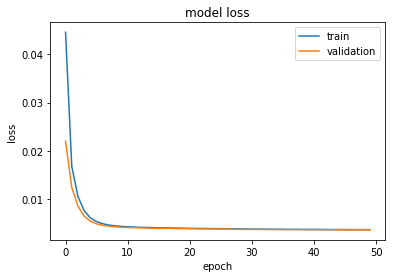

In [12]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# **Multilayer autoencoder**

### Create the network

We extend the idea of the first network to more layers

In [13]:
input_size = 784
hidden_size = 128
code_size = 64

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

### Train the network

In [14]:
epochs = 30
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 50us/step - loss: 0.0413 - val_loss: 0.0200
Epoch 2/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.0163 - val_loss: 0.0128
Epoch 3/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0119 - val_loss: 0.0105
Epoch 4/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0101 - val_loss: 0.0091
Epoch 5/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0089 - val_loss: 0.0082
Epoch 6/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0081 - val_loss: 0.0075
Epoch 7/30
60000/60000 [==============================] - 3s 43us/step - loss: 0.0075 - val_loss: 0.0070
Epoch 8/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.0070 - val_loss: 0.0065
Epoch 9/30
60000/60000 [==============================] - 3s 43us/step - loss: 0.0066 - val_loss: 0.0062
Epoch

### Predict on the test set

In [15]:
decoded_imgs = autoencoder.predict(X_test)

### Plot

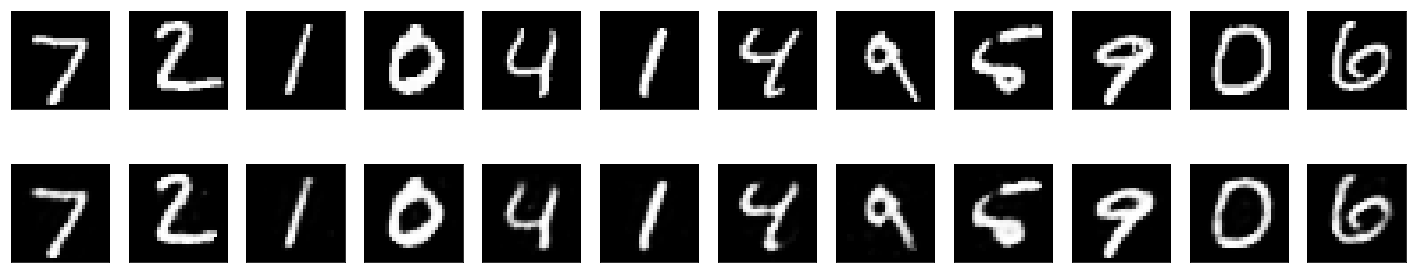

In [16]:
n = 12
plt.figure(figsize=(25, 8))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### Plot the losses

dict_keys(['val_loss', 'loss'])


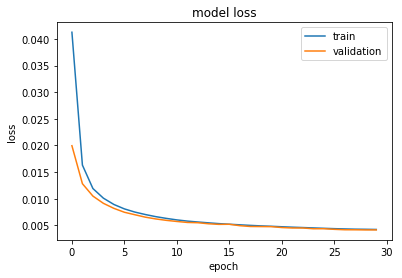

In [17]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# **Denoising autoencoder**

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

### Create noisy data

In [3]:
noise_factor = 0.9
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

### Create the network

In [4]:
x = Input(shape=(28, 28, 1))

# Encoder
conv1_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
h = MaxPooling2D((2, 2), padding='same')(conv1_2)


# Decoder
conv2_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
r = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

### Train the network

In [5]:
epochs = 6
batch_size = 128

history = autoencoder.fit(X_train_noisy, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test_noisy, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 175s 3ms/step - loss: 0.2551 - val_loss: 0.1966
Epoch 2/6
60000/60000 [==============================] - 184s 3ms/step - loss: 0.1846 - val_loss: 0.1749
Epoch 3/6
60000/60000 [==============================] - 189s 3ms/step - loss: 0.1731 - val_loss: 0.1672
Epoch 4/6
60000/60000 [==============================] - 193s 3ms/step - loss: 0.1676 - val_loss: 0.1632
Epoch 5/6
60000/60000 [==============================] - 194s 3ms/step - loss: 0.1638 - val_loss: 0.1610
Epoch 6/6
60000/60000 [==============================] - 196s 3ms/step - loss: 0.1612 - val_loss: 0.1578


In [6]:
decoded_imgs = autoencoder.predict(X_test_noisy)

### Plot

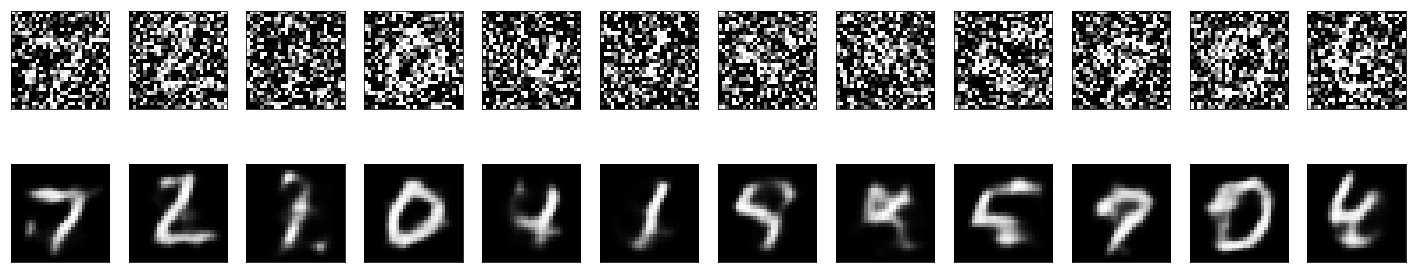

In [7]:
n = 12
plt.figure(figsize=(25, 8))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### Plot the losses

dict_keys(['val_loss', 'loss'])


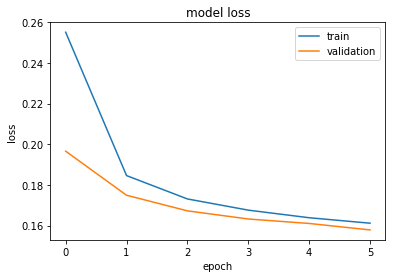

In [8]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

---